# Multiple linear regression 

In [108]:
## prepare data
import pandas as pd
import numpy as np
train_final = pd.read_csv('train_final.csv')
x = train_final.drop(['Id', 'SalePrice'], axis=1)
y = train_final['SalePrice']


(array([  5.,  11.,  13.,  61.,  58., 126., 165., 180., 122., 130., 121.,
         78.,  61.,  64.,  49.,  36.,  36.,  25.,  13.,  25.,  16.,  11.,
          4.,  11.,   9.,   5.,   4.,   4.,   4.,   2.,   1.,   1.,   1.,
          0.,   1.,   0.,   2.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.,  49302.,  63704.,  78106.,  92508., 106910., 121312.,
        135714., 150116., 164518., 178920., 193322., 207724., 222126.,
        236528., 250930., 265332., 279734., 294136., 308538., 322940.,
        337342., 351744., 366146., 380548., 394950., 409352., 423754.,
        438156., 452558., 466960., 481362., 495764., 510166., 524568.,
        538970., 553372., 567774., 582176., 596578., 610980., 625382.,
        639784., 654186., 668588., 682990., 697392., 711794., 726196.,
        740598., 755000.]),
 <a list of 50 Patch objects>)

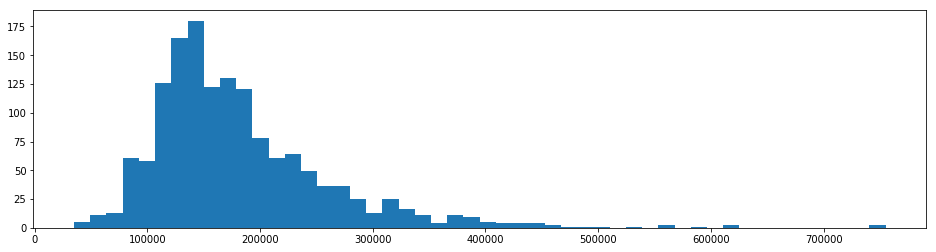

In [109]:
import matplotlib
import matplotlib.pyplot as plt
plt.hist(y, bins=50)

In [107]:
import math
y = math.log(y)
x = math.log(x)
plt.hist(y, bins=50)

TypeError: cannot convert the series to <class 'float'>

### Ridge regularization

In [193]:
from sklearn.model_selection import GridSearchCV # search for the best lambda
from sklearn import linear_model

ridge = linear_model.Ridge(normalize=True) # create a ridge regression instance

# find the best alpha (lambda) for ridge
grid_param = [{'alpha': np.logspace(-2, 5,100)}]
para_search_ridge = GridSearchCV(estimator=ridge, param_grid=grid_param, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
para_search_ridge = para_search_ridge.fit(x, y)

print(para_search_ridge.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(para_search_ridge.best_score_)))


{'alpha': 0.4229242874389499}
Lowest RMSE found:  36189.27422835055


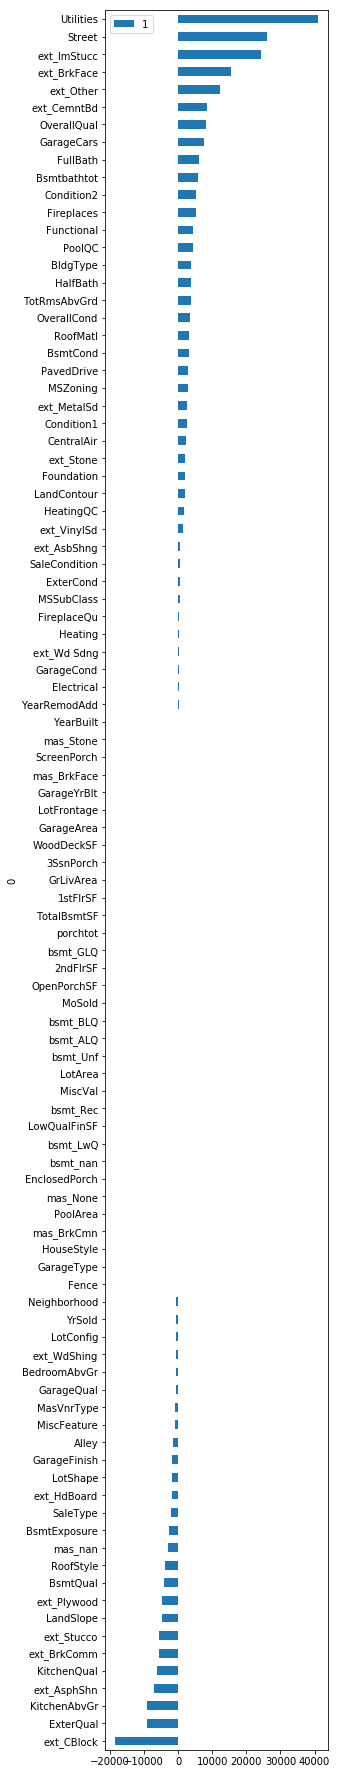

In [168]:
pd.DataFrame(list(zip(x.columns, para_search_ridge.best_estimator_.coef_))).set_index(0).sort_values(1).plot.barh()
plt.rcParams['figure.figsize'] = 4, 32

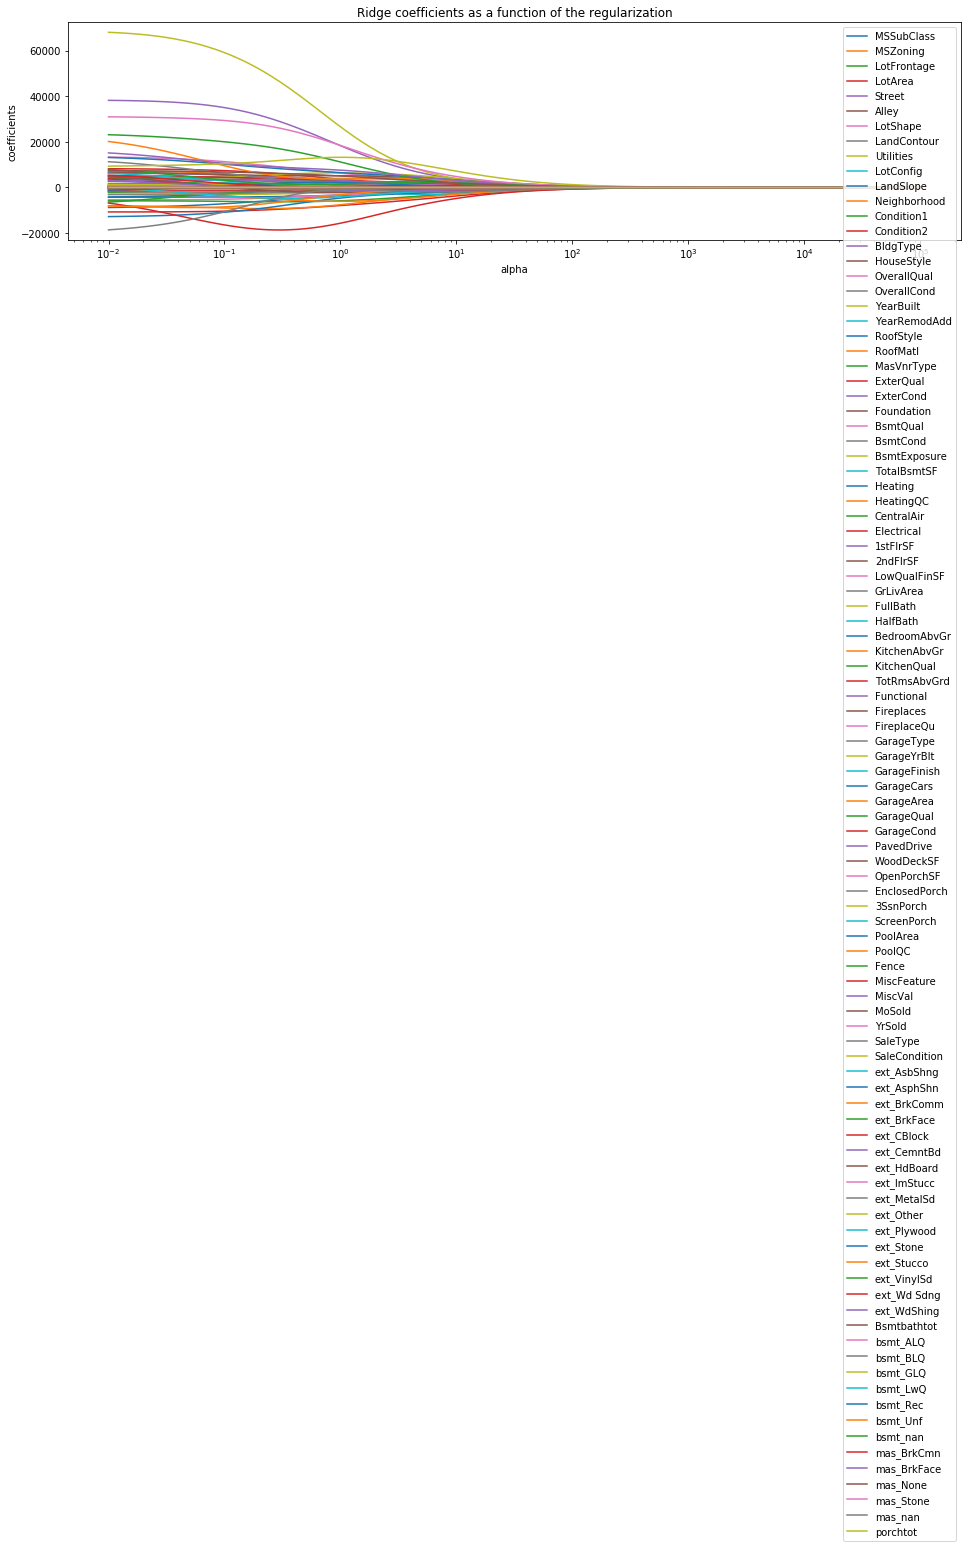

In [175]:
alpha_100 = np.logspace(-2, 5, 100)
coef = []
for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(x, y)
    coef.append(ridge.coef_)

df_coef = pd.DataFrame(coef, index=alpha_100, columns=x.columns)
title = 'Ridge coefficients as a function of the regularization'
axes = df_coef.plot(logx=True, title=title)
axes.set_xlabel('alpha')
axes.set_ylabel('coefficients')
plt.rcParams['figure.figsize'] = 16, 4

In [210]:
ridge_pred_y = para_search_ridge.predict(estimator=Ridge(alpha = para_search_ridge.best_params_), normalize=True)

TypeError: predict() got an unexpected keyword argument 'alpha'

### Lasso regularization

In [192]:
import warnings
warnings.filterwarnings('ignore')

lasso = linear_model.Lasso(normalize=True) # create a ridge regression instance

# find the best alpha (lambda) for lasso 
grid_param = [{'alpha': np.logspace(-2, 5, 100)}]
para_search_lasso = GridSearchCV(estimator=lasso, param_grid=grid_param, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
para_search_lasso = para_search_lasso.fit(x, y)

print(para_search_lasso.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(para_search_lasso.best_score_)))

{'alpha': 47.50810162102793}
Lowest RMSE found:  36824.83481246612


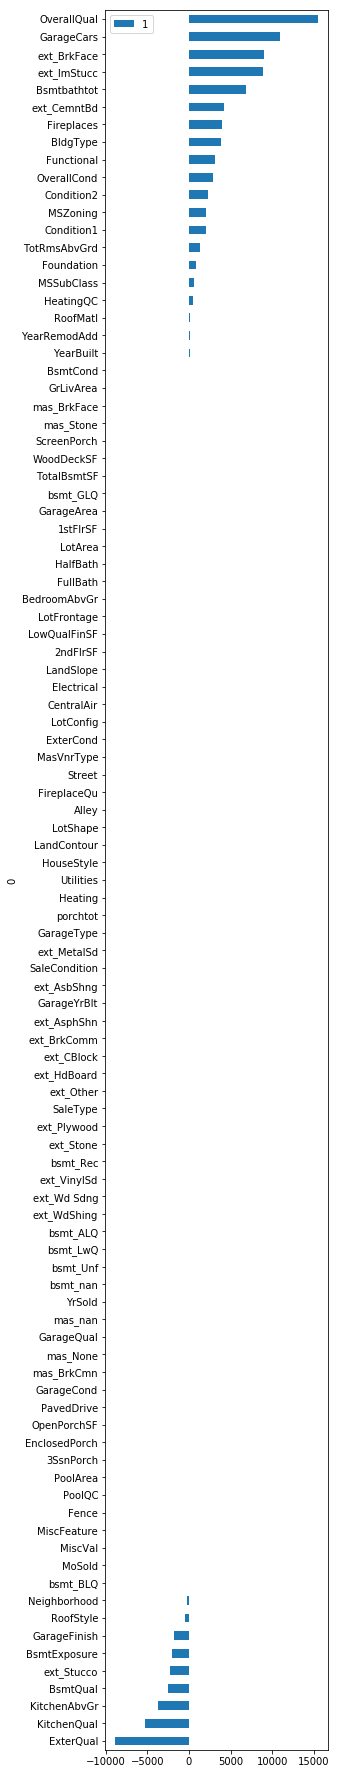

In [173]:
pd.DataFrame(list(zip(x.columns, para_search_lasso.best_estimator_.coef_))).set_index(0).sort_values(1).plot.barh()
plt.rcParams['figure.figsize'] = 4, 32

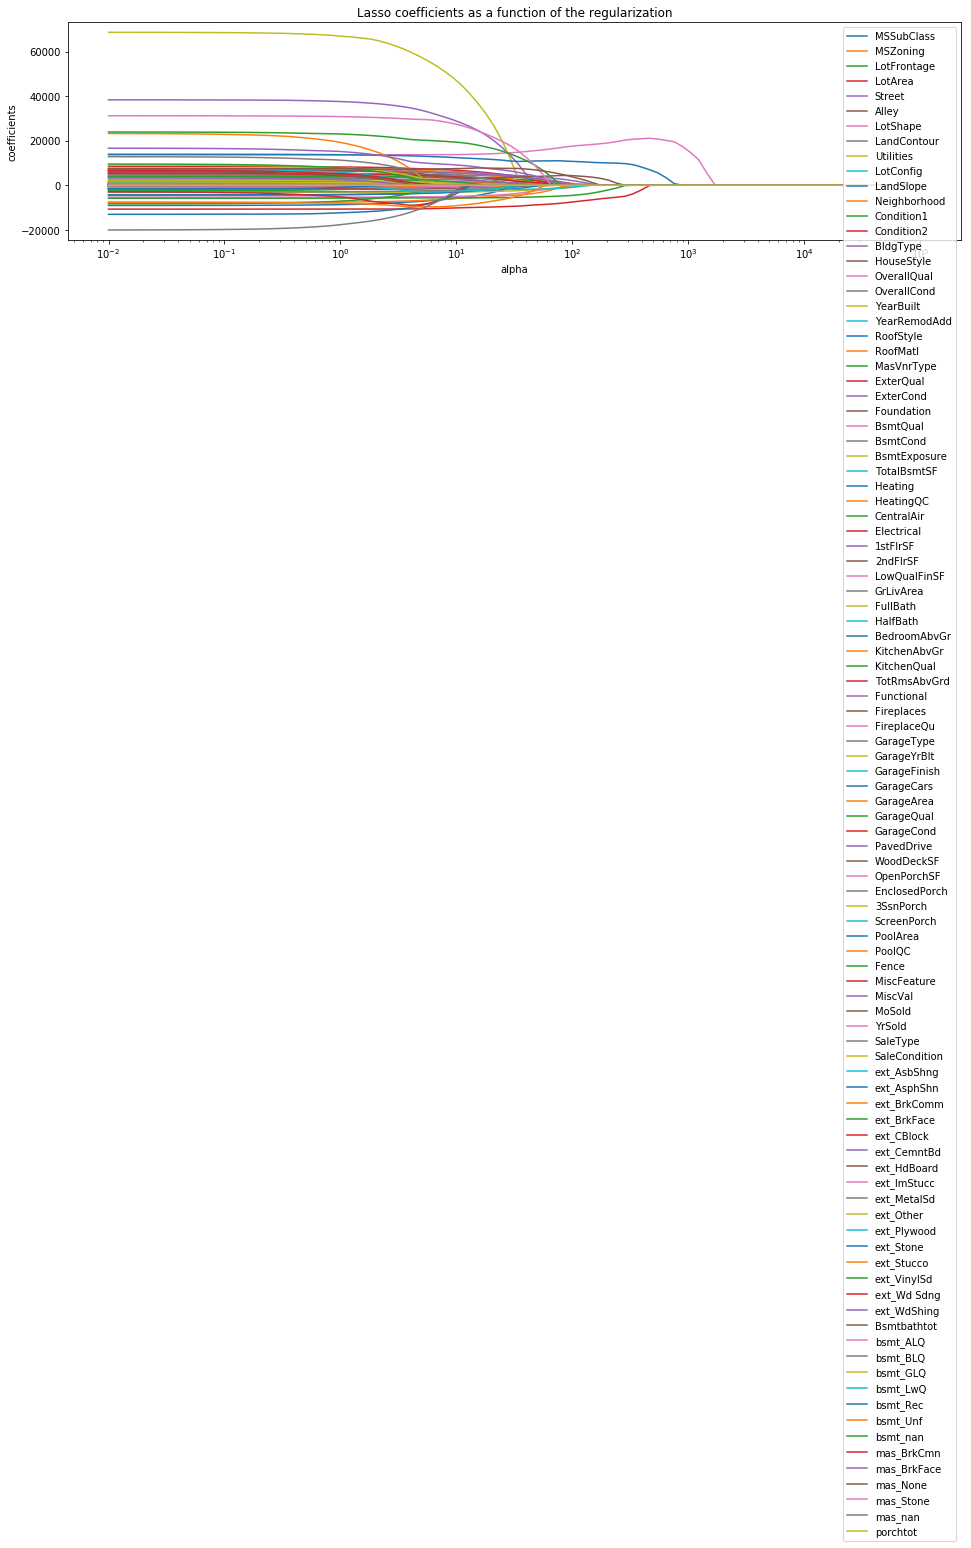

In [182]:
alpha_100 = np.logspace(-2, 5, 100)
coef = []
for i in alpha_100:
    lasso.set_params(alpha = i)
    lasso.fit(x, y)
    coef.append(lasso.coef_)

df_coef = pd.DataFrame(coef, index=alpha_100, columns=x.columns)
title = 'Lasso coefficients as a function of the regularization'
axes = df_coef.plot(logx=True, title=title)
axes.set_xlabel('alpha')
axes.set_ylabel('coefficients')
plt.rcParams['figure.figsize'] = 16, 4

### Elastic net regularization

In [198]:
elasticnet = linear_model.ElasticNet(normalize=True) # create a ridge regression instance

# find the best alpha (lambda) for lasso 
grid_param = [{'alpha': np.logspace(-2, 4, 100), 'l1_ratio': np.arange(0, 1.1, 0.1)}]
para_search_elas = GridSearchCV(estimator=elasticnet, param_grid=grid_param, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
para_search_elas = para_search_elas.fit(x, y)

print(para_search_elas.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(para_search_elas.best_score_)))


{'alpha': 43.287612810830616, 'l1_ratio': 1.0}
Lowest RMSE found:  36826.45930992512


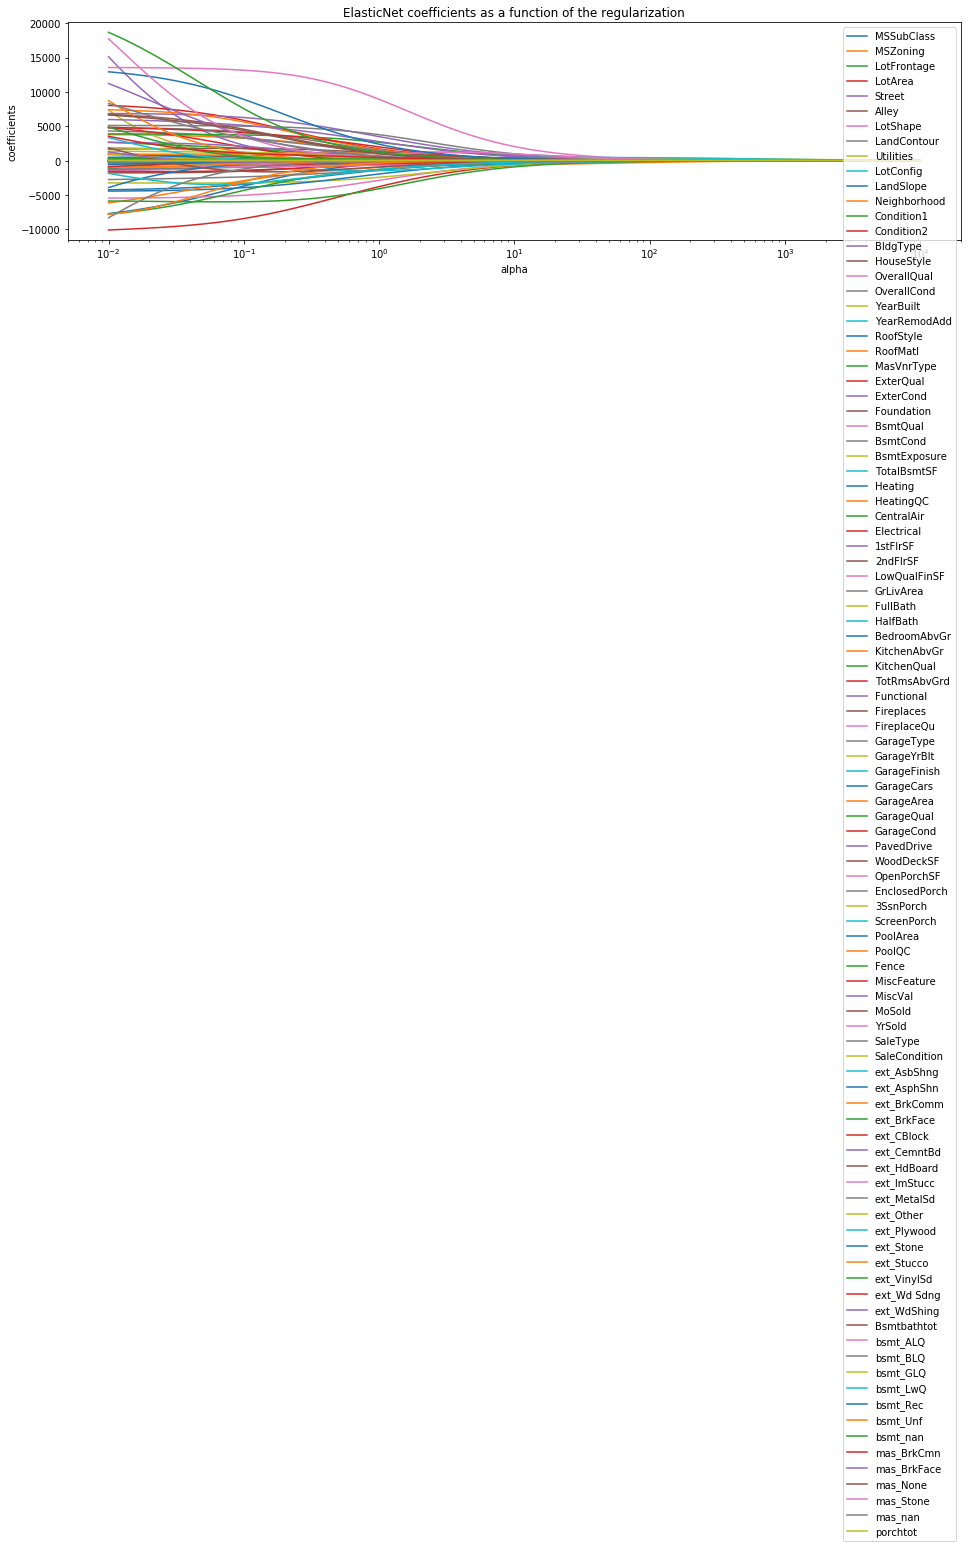

In [199]:
alphas_elastic = np.logspace(-2, 4, 100)
coef_elastic = []
for i in alphas_elastic:
    elastic = linear_model.ElasticNet(l1_ratio =0.5)
    elastic.set_params(alpha = i)
    elastic.fit(x, y)
    coef_elastic.append(elastic.coef_)

df_coef = pd.DataFrame(coef_elastic, index=alphas_elastic, columns=x.columns)
title = 'ElasticNet coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()